# Predicting heart disease using machine learning
This notebook uses various python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting heart disease in patients based on thier medical attributes.

> If we can reach 90% accuracy at predicting whether or not a patient has heart disease during the proof of concept ,we'll
pursue the project.

## Getting Our Tools Ready

In [1]:
# import Data visualizing and manipulating tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# import tools for model evaluation
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix,classification_report,plot_roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV

## attributes \ features of data we working on.

* age in years
* sex (male=1\female=0)
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* target 1 or 0

### Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head(),df.shape

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  target  
 0   0     1       1  
 1   0     2       1  
 2   0     2       1  
 3   0     2       1  
 4   0     2       1  ,
 (303, 14))

### data exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the data

1. What questions are you trying to solve?
2. What kind of data do we have and how we treat different types?
3. What's missing from the Data and how to deal with it?
4. Where are outliners and why should you care about them?
5. How can you add or remove features to get more out of the Data?


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Lets find out how many of each class there
df.target.value_counts()
# This is balanced classification problem

1    165
0    138
Name: target, dtype: int64

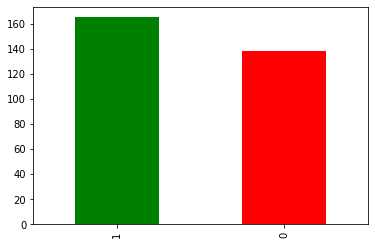

In [4]:
df["target"].value_counts().plot(kind = "bar",color = ["green","red"]);

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
# Are there any missing values()
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Heart disease Frequency according to Sex

In [30]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [31]:
72/(72+24)*100 # Females have heart-disease 75%

75.0

In [32]:
93/(114+93)*100 # Males have h-disease 45%

44.927536231884055

In [33]:
(75+44)/2

59.5

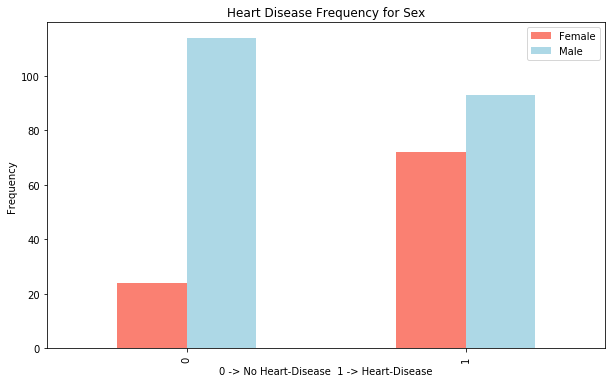

In [36]:
pd.crosstab(df.target,df.sex).plot(kind = "bar",figsize = (10,6),color = ["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 -> No Heart-Disease  1 -> Heart-Disease")
plt.legend(["Female","Male"])
plt.ylabel("Frequency");

In [37]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [38]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

### Age vs max-heart rate for Heart disease

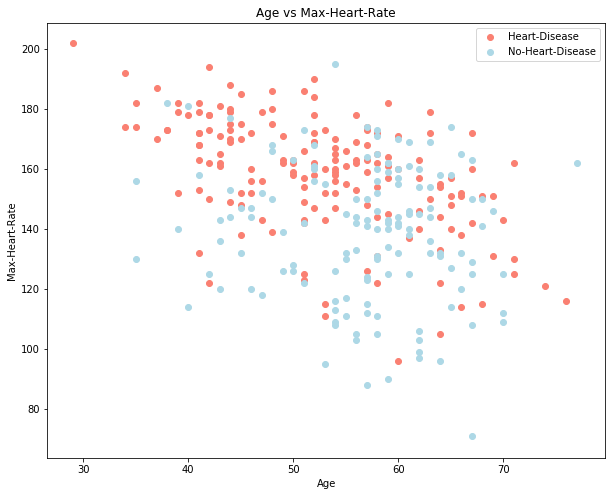

In [74]:
# With Possitive(Salmon) & Negative(lightblue) examples
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8))
scatter1 = ax.scatter(df["age"][df["target"]==1],df["thalach"][df["target"]==1],c = "salmon")
scatter2 = ax.scatter(df["age"][df["target"]==0],df["thalach"][df["target"]==0],c = "lightblue")
ax.set(title = "Age vs Max-Heart-Rate",xlabel = "Age",ylabel = "Max-Heart-Rate")
ax.legend((scatter1,scatter2),("Heart-Disease","No-Heart-Disease"));

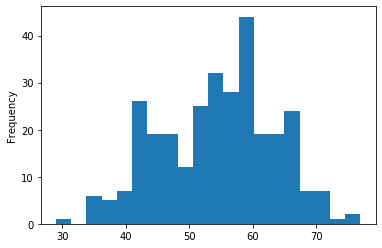

In [73]:
# check the distribution of the age with a histogram
df["age"].plot.hist(bins = 20);

### Heart disease Frequency per Chest-Pain Type (4-type)

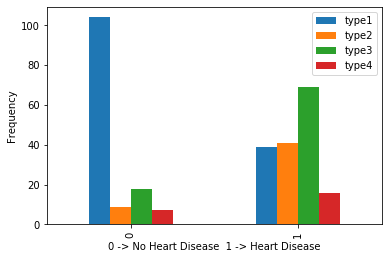

In [81]:
pd.crosstab(df.target,df.cp).plot(kind = "bar")
plt.ylabel("Frequency")
plt.xlabel("0 -> No Heart Disease  1 -> Heart Disease")
plt.legend(["type1","type2","type3","type4"]);

#### Here type-2 has more Heart-disease

In [5]:
# Make Correlation Matrix
corr_mat = df.corr()
corr_mat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


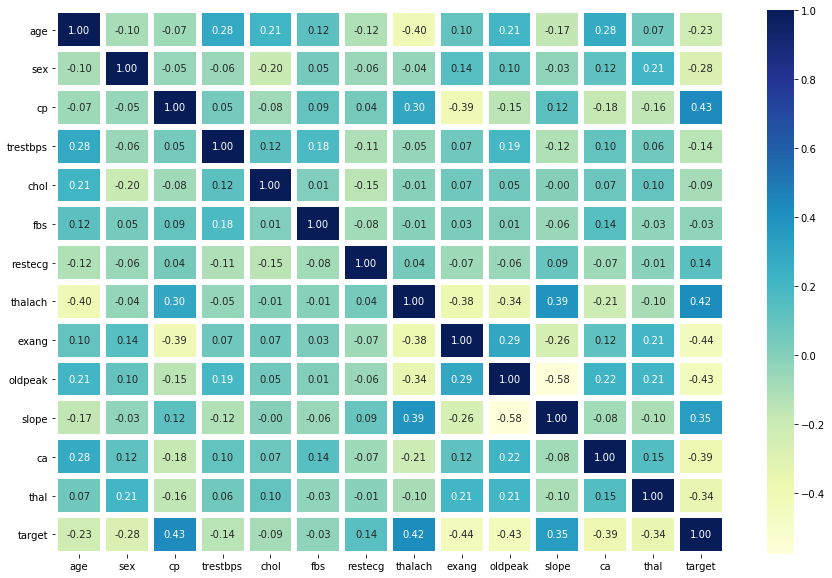

In [6]:
# Let's make our correlation matrix more vissual
import seaborn
fig,ax = plt.subplots(figsize = (15,10))
ax = seaborn.heatmap(corr_mat,annot = True,fmt = ".2f",linewidths=5,cmap = "YlGnBu");

## Modeling

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# split the data into X & y
X = df.drop("target",axis = 1)
y = df["target"]

In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [4]:
# split data into train and test sets
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [25]:
models = {"KNeighbors":KNeighborsClassifier(),
         "LogisticRegression":LogisticRegression(),
         "RandomForestClassifier":RandomForestClassifier()}
result = {}
np.random.seed(42)
for key,value in models.items():
    value.fit(X_train,y_train)
    result[key] = value.score(X_test,y_test)
result

C:\Users\DELL\Desktop\FirstProject\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNeighbors': 0.6885245901639344,
 'LogisticRegression': 0.8852459016393442,
 'RandomForestClassifier': 0.8360655737704918}

### Model comparison

In [26]:
model_compare = pd.DataFrame(result,index = ["accuracy"])

In [29]:
model_compare.shape

(1, 3)

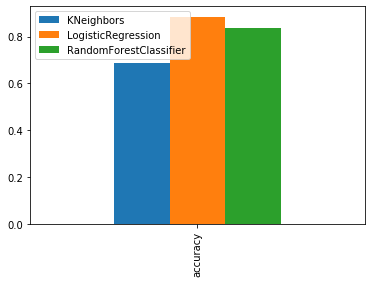

In [31]:
model_compare.plot(kind = "bar")

### HyperParameter Tuning

In [38]:
# lets tune KNN
train_scores = []
test_scores = []

# create a list of different values for n-neighbors
neighbours = range(1,21)

# setup knn instance
knn = KNeighborsClassifier()

# Loop through diff n_neighbors
for i in neighbours:
    knn.set_params(n_neighbors = i)
    
    # Fit the model
    knn.fit(X_train,y_train)
    
    # udate train scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # update the test scores list
    test_scores.append(knn.score(X_test,y_test))


In [39]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

max score of KNN is 75.40983606557377%


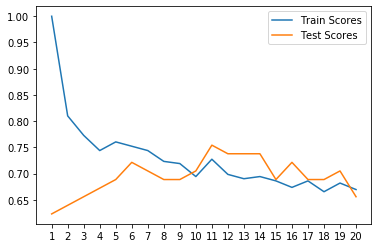

In [43]:
plt.plot(neighbours,train_scores,label = "Train Scores")
plt.plot(neighbours,test_scores,label = "Test Scores")
plt.xticks(np.arange(1,21,1))
plt.legend();
print(f"max score of KNN is {max(test_scores)*100}%")

## Hyperparameter Tuning With RandomizedSearchCV
 * LogisticRegression
 * RandomForestClassifier

In [6]:
# Create a hyper parameter-grid for LogisticRegression
np.random.seed(42)
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}

# Create Hyperparameter grid for RandomForest
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":(1,20,2)}

In [7]:
# Tune LogisticRegression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv = 5,n_iter = 20,verbose = True)

# Fit Random Hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [8]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [9]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [21]:
# Tune RandomForest
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv = 5,n_iter = 20,verbose = True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [22]:
rs_rf.best_params_

{'n_estimators': 760,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_depth': 3}

In [23]:
rs_rf.score(X_test,y_test)

0.8852459016393442

### Hyperparameter Tuning with GridSearchCV

In [55]:
# Different hyperparameters for our LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}
# set up grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv = 5,verbose = 2)

# Fit the our gridSearch model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV] ....... C=0.00018873918221350977, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.03039195382313198, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, solver=liblinear .........................
[CV] .......... C=0.05736152510448681, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, solver=liblinear .........................
[CV] .......... C=0.05736152510448681, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, solver=liblinear .........................
[CV] .......... C=0.05736152510448681, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, solver=liblinear .........................
[CV] .......... C=0.05736152510448681, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, solver=liblinear .........................
[CV] .......... C=0.05736152510448681, solver=liblinear, total=   0.0s
[CV] C=0.1082636733874054, solver=liblinear ..........................
[CV] ........... C=0.1082636733874054, solver=liblinear, total=   0.0s
[CV] C=0.1082636733874054, solver=liblinear ..........................
[CV] .

[CV] ........... C=2807.2162039411755, solver=liblinear, total=   0.0s
[CV] C=2807.2162039411755, solver=liblinear ..........................
[CV] ........... C=2807.2162039411755, solver=liblinear, total=   0.0s
[CV] C=2807.2162039411755, solver=liblinear ..........................
[CV] ........... C=2807.2162039411755, solver=liblinear, total=   0.0s
[CV] C=5298.316906283702, solver=liblinear ...........................
[CV] ............ C=5298.316906283702, solver=liblinear, total=   0.0s
[CV] C=5298.316906283702, solver=liblinear ...........................
[CV] ............ C=5298.316906283702, solver=liblinear, total=   0.0s
[CV] C=5298.316906283702, solver=liblinear ...........................
[CV] ............ C=5298.316906283702, solver=liblinear, total=   0.0s
[CV] C=5298.316906283702, solver=liblinear ...........................
[CV] ............ C=5298.316906283702, solver=liblinear, total=   0.0s
[CV] C=5298.316906283702, solver=liblinear ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [57]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [58]:
# Evaluate the grid search LogisticRegresion Model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [59]:
result

{'KNeighbors': 0.6885245901639344,
 'LogisticRegression': 0.8852459016393442,
 'RandomForestClassifier': 0.8360655737704918}

## Evaluating our trained Machine learning Model

In [60]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

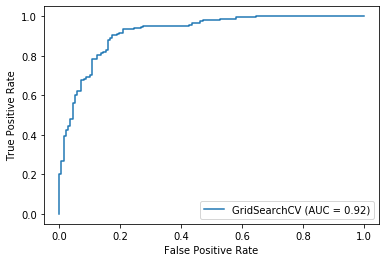

In [63]:
plot_roc_curve(gs_log_reg,X,y);

In [64]:
# confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [65]:
import seaborn

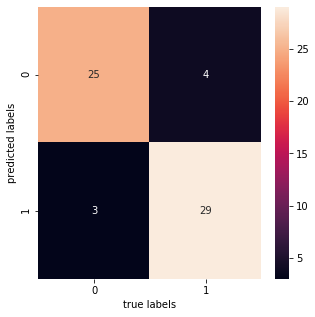

In [69]:
fig,ax = plt.subplots(figsize = (5,5))
ax = seaborn.heatmap(confusion_matrix(y_test,y_preds),annot = True)
plt.xlabel("true labels")
plt.ylabel("predicted labels");

In [70]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [82]:
# finding classification report for 5 fold Cross-validation
log_reg_model = LogisticRegression(C = 0.20433597178569418, solver = "liblinear")

accuracy = cross_val_score(log_reg_model,X,y,scoring="accuracy")
cv_acc = np.mean(accuracy)
cv_acc

0.8446994535519124

In [83]:
precision = cross_val_score(log_reg_model,X,y,scoring = "precision")
cv_precision = np.mean(precision)
cv_precision

0.8207936507936507

In [84]:
recall = cross_val_score(log_reg_model,X,y,scoring = "recall")
cv_recall = np.mean(recall)
cv_recall

0.9212121212121213

In [85]:
f1 = cross_val_score(log_reg_model,X,y,scoring = "f1")
cv_f1 = np.mean(f1)
cv_f1

0.8673007976269721

In [87]:
# vissualize our cross validated metrics
cv_metrics = pd.DataFrame({"accuracy":cv_acc,
                          "precision":cv_precision,
                          "recall":cv_recall,
                          "f1":cv_f1},index = [0])
cv_metrics

,accuracy,precision,recall,f1
0,0.844699,0.820794,0.921212,0.867301


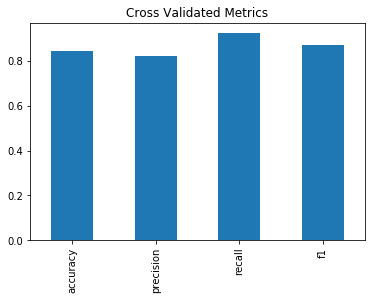

In [91]:
cv_metrics.T.plot.bar(title ="Cross Validated Metrics",legend = False);

### Feature Importance
Feature importanceis another way of asking ,"which feature contributed most to the outcomes of the model
and How did they contribute?"

Finding feature importance is different for each ML model.

Lets find feature importance for our LogisticRegression model..

In [93]:
# Fit an instance of LogisticRegression
log_reg_model.fit(X_train,y_train);

In [94]:
# check coef_
log_reg_model.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [98]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns,log_reg_model.coef_[0]))
feature_dict


{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [99]:
# Vissualize feature importance
feature_df = pd.DataFrame(feature_dict,index = [0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


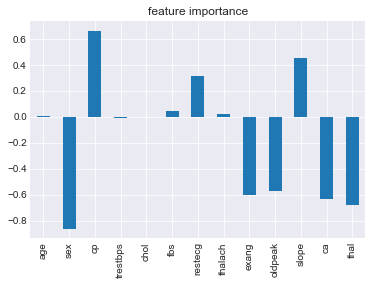

In [109]:
plt.style.use("seaborn-darkgrid")
feature_df.T.plot.bar(title = "feature importance",legend = False);

## Experimentation
 If you haven't hit your evaluation metric yet ... ask yourself....
 * Could you collect more data?
 * Could you try a better model? Like CatBoost or XGBoost?
 * Could you improve the current model? (Hyperparameyer tuning)
 If model lis good enough export the model and share it.

### Tuning our RandomForestModel using GridSearchCV

In [11]:
RandomForestClassifier().get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [45]:
# Lets tune Randomforest
np.random.seed(42)
grid = {"n_estimators":np.arange(20,1000,100),
       "max_depth":[3,4,6],
       "max_leaf_nodes":np.arange(4,20,2)}

In [46]:
np.random.seed(42)
gs_rf = GridSearchCV(RandomForestClassifier(),param_grid=grid,cv = 5,verbose=2)
gs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] max_depth=3, max_leaf_nodes=4, n_estimators=20 ..................
[CV] ... max_depth=3, max_leaf_nodes=4, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=4, n_estimators=20 ..................
[CV] ... max_depth=3, max_leaf_nodes=4, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=4, n_estimators=20 ..................
[CV] ... max_depth=3, max_leaf_nodes=4, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=4, n_estimators=20 ..................
[CV] ... max_depth=3, max_leaf_nodes=4, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=4, n_estimators=20 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ... max_depth=3, max_leaf_nodes=4, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=4, n_estimators=120 .................
[CV] .. max_depth=3, max_leaf_nodes=4, n_estimators=120, total=   0.2s
[CV] max_depth=3, max_leaf_nodes=4, n_estimators=120 .................
[CV] .. max_depth=3, max_leaf_nodes=4, n_estimators=120, total=   0.3s
[CV] max_depth=3, max_leaf_nodes=4, n_estimators=120 .................
[CV] .. max_depth=3, max_leaf_nodes=4, n_estimators=120, total=   0.2s
[CV] max_depth=3, max_leaf_nodes=4, n_estimators=120 .................
[CV] .. max_depth=3, max_leaf_nodes=4, n_estimators=120, total=   0.2s
[CV] max_depth=3, max_leaf_nodes=4, n_estimators=120 .................
[CV] .. max_depth=3, max_leaf_nodes=4, n_estimators=120, total=   0.2s
[CV] max_depth=3, max_leaf_nodes=4, n_estimators=220 .................
[CV] .. max_depth=3, max_leaf_nodes=4, n_estimators=220, total=   0.4s
[CV] max_depth=3, max_leaf_nodes=4, n_estimators=220 .................
[CV] .

[CV] .. max_depth=3, max_leaf_nodes=6, n_estimators=220, total=   0.3s
[CV] max_depth=3, max_leaf_nodes=6, n_estimators=220 .................
[CV] .. max_depth=3, max_leaf_nodes=6, n_estimators=220, total=   0.3s
[CV] max_depth=3, max_leaf_nodes=6, n_estimators=220 .................
[CV] .. max_depth=3, max_leaf_nodes=6, n_estimators=220, total=   0.3s
[CV] max_depth=3, max_leaf_nodes=6, n_estimators=320 .................
[CV] .. max_depth=3, max_leaf_nodes=6, n_estimators=320, total=   0.5s
[CV] max_depth=3, max_leaf_nodes=6, n_estimators=320 .................
[CV] .. max_depth=3, max_leaf_nodes=6, n_estimators=320, total=   0.5s
[CV] max_depth=3, max_leaf_nodes=6, n_estimators=320 .................
[CV] .. max_depth=3, max_leaf_nodes=6, n_estimators=320, total=   0.5s
[CV] max_depth=3, max_leaf_nodes=6, n_estimators=320 .................
[CV] .. max_depth=3, max_leaf_nodes=6, n_estimators=320, total=   0.5s
[CV] max_depth=3, max_leaf_nodes=6, n_estimators=320 .................
[CV] .

[CV] .. max_depth=3, max_leaf_nodes=8, n_estimators=420, total=   0.6s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=420 .................
[CV] .. max_depth=3, max_leaf_nodes=8, n_estimators=420, total=   0.7s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=420 .................
[CV] .. max_depth=3, max_leaf_nodes=8, n_estimators=420, total=   0.6s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=420 .................
[CV] .. max_depth=3, max_leaf_nodes=8, n_estimators=420, total=   0.6s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=420 .................
[CV] .. max_depth=3, max_leaf_nodes=8, n_estimators=420, total=   0.6s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=520 .................
[CV] .. max_depth=3, max_leaf_nodes=8, n_estimators=520, total=   0.7s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=520 .................
[CV] .. max_depth=3, max_leaf_nodes=8, n_estimators=520, total=   0.8s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=520 .................
[CV] .

[CV] . max_depth=3, max_leaf_nodes=10, n_estimators=520, total=   0.6s
[CV] max_depth=3, max_leaf_nodes=10, n_estimators=520 ................
[CV] . max_depth=3, max_leaf_nodes=10, n_estimators=520, total=   0.6s
[CV] max_depth=3, max_leaf_nodes=10, n_estimators=620 ................
[CV] . max_depth=3, max_leaf_nodes=10, n_estimators=620, total=   0.7s
[CV] max_depth=3, max_leaf_nodes=10, n_estimators=620 ................
[CV] . max_depth=3, max_leaf_nodes=10, n_estimators=620, total=   0.7s
[CV] max_depth=3, max_leaf_nodes=10, n_estimators=620 ................
[CV] . max_depth=3, max_leaf_nodes=10, n_estimators=620, total=   0.7s
[CV] max_depth=3, max_leaf_nodes=10, n_estimators=620 ................
[CV] . max_depth=3, max_leaf_nodes=10, n_estimators=620, total=   0.7s
[CV] max_depth=3, max_leaf_nodes=10, n_estimators=620 ................
[CV] . max_depth=3, max_leaf_nodes=10, n_estimators=620, total=   1.0s
[CV] max_depth=3, max_leaf_nodes=10, n_estimators=720 ................
[CV] .

[CV] . max_depth=3, max_leaf_nodes=12, n_estimators=720, total=   0.8s
[CV] max_depth=3, max_leaf_nodes=12, n_estimators=720 ................
[CV] . max_depth=3, max_leaf_nodes=12, n_estimators=720, total=   0.8s
[CV] max_depth=3, max_leaf_nodes=12, n_estimators=720 ................
[CV] . max_depth=3, max_leaf_nodes=12, n_estimators=720, total=   0.8s
[CV] max_depth=3, max_leaf_nodes=12, n_estimators=720 ................
[CV] . max_depth=3, max_leaf_nodes=12, n_estimators=720, total=   0.8s
[CV] max_depth=3, max_leaf_nodes=12, n_estimators=820 ................
[CV] . max_depth=3, max_leaf_nodes=12, n_estimators=820, total=   0.9s
[CV] max_depth=3, max_leaf_nodes=12, n_estimators=820 ................
[CV] . max_depth=3, max_leaf_nodes=12, n_estimators=820, total=   0.9s
[CV] max_depth=3, max_leaf_nodes=12, n_estimators=820 ................
[CV] . max_depth=3, max_leaf_nodes=12, n_estimators=820, total=   1.0s
[CV] max_depth=3, max_leaf_nodes=12, n_estimators=820 ................
[CV] .

[CV] . max_depth=3, max_leaf_nodes=14, n_estimators=820, total=   1.0s
[CV] max_depth=3, max_leaf_nodes=14, n_estimators=920 ................
[CV] . max_depth=3, max_leaf_nodes=14, n_estimators=920, total=   1.1s
[CV] max_depth=3, max_leaf_nodes=14, n_estimators=920 ................
[CV] . max_depth=3, max_leaf_nodes=14, n_estimators=920, total=   1.1s
[CV] max_depth=3, max_leaf_nodes=14, n_estimators=920 ................
[CV] . max_depth=3, max_leaf_nodes=14, n_estimators=920, total=   1.1s
[CV] max_depth=3, max_leaf_nodes=14, n_estimators=920 ................
[CV] . max_depth=3, max_leaf_nodes=14, n_estimators=920, total=   1.1s
[CV] max_depth=3, max_leaf_nodes=14, n_estimators=920 ................
[CV] . max_depth=3, max_leaf_nodes=14, n_estimators=920, total=   1.1s
[CV] max_depth=3, max_leaf_nodes=16, n_estimators=20 .................
[CV] .. max_depth=3, max_leaf_nodes=16, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=16, n_estimators=20 .................
[CV] .

[CV] . max_depth=3, max_leaf_nodes=18, n_estimators=120, total=   0.2s
[CV] max_depth=3, max_leaf_nodes=18, n_estimators=120 ................
[CV] . max_depth=3, max_leaf_nodes=18, n_estimators=120, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=18, n_estimators=120 ................
[CV] . max_depth=3, max_leaf_nodes=18, n_estimators=120, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=18, n_estimators=120 ................
[CV] . max_depth=3, max_leaf_nodes=18, n_estimators=120, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=18, n_estimators=120 ................
[CV] . max_depth=3, max_leaf_nodes=18, n_estimators=120, total=   0.2s
[CV] max_depth=3, max_leaf_nodes=18, n_estimators=220 ................
[CV] . max_depth=3, max_leaf_nodes=18, n_estimators=220, total=   0.3s
[CV] max_depth=3, max_leaf_nodes=18, n_estimators=220 ................
[CV] . max_depth=3, max_leaf_nodes=18, n_estimators=220, total=   0.3s
[CV] max_depth=3, max_leaf_nodes=18, n_estimators=220 ................
[CV] .

[CV] .. max_depth=4, max_leaf_nodes=4, n_estimators=220, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=4, n_estimators=220 .................
[CV] .. max_depth=4, max_leaf_nodes=4, n_estimators=220, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=4, n_estimators=320 .................
[CV] .. max_depth=4, max_leaf_nodes=4, n_estimators=320, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=4, n_estimators=320 .................
[CV] .. max_depth=4, max_leaf_nodes=4, n_estimators=320, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=4, n_estimators=320 .................
[CV] .. max_depth=4, max_leaf_nodes=4, n_estimators=320, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=4, n_estimators=320 .................
[CV] .. max_depth=4, max_leaf_nodes=4, n_estimators=320, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=4, n_estimators=320 .................
[CV] .. max_depth=4, max_leaf_nodes=4, n_estimators=320, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=4, n_estimators=420 .................
[CV] .

[CV] .. max_depth=4, max_leaf_nodes=6, n_estimators=420, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, n_estimators=420 .................
[CV] .. max_depth=4, max_leaf_nodes=6, n_estimators=420, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, n_estimators=420 .................
[CV] .. max_depth=4, max_leaf_nodes=6, n_estimators=420, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, n_estimators=420 .................
[CV] .. max_depth=4, max_leaf_nodes=6, n_estimators=420, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, n_estimators=520 .................
[CV] .. max_depth=4, max_leaf_nodes=6, n_estimators=520, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=6, n_estimators=520 .................
[CV] .. max_depth=4, max_leaf_nodes=6, n_estimators=520, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=6, n_estimators=520 .................
[CV] .. max_depth=4, max_leaf_nodes=6, n_estimators=520, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=6, n_estimators=520 .................
[CV] .

[CV] .. max_depth=4, max_leaf_nodes=8, n_estimators=520, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=8, n_estimators=620 .................
[CV] .. max_depth=4, max_leaf_nodes=8, n_estimators=620, total=   0.7s
[CV] max_depth=4, max_leaf_nodes=8, n_estimators=620 .................
[CV] .. max_depth=4, max_leaf_nodes=8, n_estimators=620, total=   0.7s
[CV] max_depth=4, max_leaf_nodes=8, n_estimators=620 .................
[CV] .. max_depth=4, max_leaf_nodes=8, n_estimators=620, total=   0.7s
[CV] max_depth=4, max_leaf_nodes=8, n_estimators=620 .................
[CV] .. max_depth=4, max_leaf_nodes=8, n_estimators=620, total=   0.7s
[CV] max_depth=4, max_leaf_nodes=8, n_estimators=620 .................
[CV] .. max_depth=4, max_leaf_nodes=8, n_estimators=620, total=   0.7s
[CV] max_depth=4, max_leaf_nodes=8, n_estimators=720 .................
[CV] .. max_depth=4, max_leaf_nodes=8, n_estimators=720, total=   0.9s
[CV] max_depth=4, max_leaf_nodes=8, n_estimators=720 .................
[CV] .

[CV] . max_depth=4, max_leaf_nodes=10, n_estimators=720, total=   0.8s
[CV] max_depth=4, max_leaf_nodes=10, n_estimators=720 ................
[CV] . max_depth=4, max_leaf_nodes=10, n_estimators=720, total=   0.8s
[CV] max_depth=4, max_leaf_nodes=10, n_estimators=720 ................
[CV] . max_depth=4, max_leaf_nodes=10, n_estimators=720, total=   0.8s
[CV] max_depth=4, max_leaf_nodes=10, n_estimators=820 ................
[CV] . max_depth=4, max_leaf_nodes=10, n_estimators=820, total=   1.0s
[CV] max_depth=4, max_leaf_nodes=10, n_estimators=820 ................
[CV] . max_depth=4, max_leaf_nodes=10, n_estimators=820, total=   1.0s
[CV] max_depth=4, max_leaf_nodes=10, n_estimators=820 ................
[CV] . max_depth=4, max_leaf_nodes=10, n_estimators=820, total=   1.0s
[CV] max_depth=4, max_leaf_nodes=10, n_estimators=820 ................
[CV] . max_depth=4, max_leaf_nodes=10, n_estimators=820, total=   1.0s
[CV] max_depth=4, max_leaf_nodes=10, n_estimators=820 ................
[CV] .

[CV] . max_depth=4, max_leaf_nodes=12, n_estimators=920, total=   1.2s
[CV] max_depth=4, max_leaf_nodes=12, n_estimators=920 ................
[CV] . max_depth=4, max_leaf_nodes=12, n_estimators=920, total=   1.1s
[CV] max_depth=4, max_leaf_nodes=12, n_estimators=920 ................
[CV] . max_depth=4, max_leaf_nodes=12, n_estimators=920, total=   1.1s
[CV] max_depth=4, max_leaf_nodes=12, n_estimators=920 ................
[CV] . max_depth=4, max_leaf_nodes=12, n_estimators=920, total=   1.1s
[CV] max_depth=4, max_leaf_nodes=12, n_estimators=920 ................
[CV] . max_depth=4, max_leaf_nodes=12, n_estimators=920, total=   1.1s
[CV] max_depth=4, max_leaf_nodes=14, n_estimators=20 .................
[CV] .. max_depth=4, max_leaf_nodes=14, n_estimators=20, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=14, n_estimators=20 .................
[CV] .. max_depth=4, max_leaf_nodes=14, n_estimators=20, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=14, n_estimators=20 .................
[CV] .

[CV] . max_depth=4, max_leaf_nodes=16, n_estimators=120, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=16, n_estimators=120 ................
[CV] . max_depth=4, max_leaf_nodes=16, n_estimators=120, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=16, n_estimators=120 ................
[CV] . max_depth=4, max_leaf_nodes=16, n_estimators=120, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=16, n_estimators=120 ................
[CV] . max_depth=4, max_leaf_nodes=16, n_estimators=120, total=   0.1s
[CV] max_depth=4, max_leaf_nodes=16, n_estimators=120 ................
[CV] . max_depth=4, max_leaf_nodes=16, n_estimators=120, total=   0.1s
[CV] max_depth=4, max_leaf_nodes=16, n_estimators=220 ................
[CV] . max_depth=4, max_leaf_nodes=16, n_estimators=220, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=16, n_estimators=220 ................
[CV] . max_depth=4, max_leaf_nodes=16, n_estimators=220, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=16, n_estimators=220 ................
[CV] .

[CV] . max_depth=4, max_leaf_nodes=18, n_estimators=220, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=18, n_estimators=220 ................
[CV] . max_depth=4, max_leaf_nodes=18, n_estimators=220, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=18, n_estimators=320 ................
[CV] . max_depth=4, max_leaf_nodes=18, n_estimators=320, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=18, n_estimators=320 ................
[CV] . max_depth=4, max_leaf_nodes=18, n_estimators=320, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=18, n_estimators=320 ................
[CV] . max_depth=4, max_leaf_nodes=18, n_estimators=320, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=18, n_estimators=320 ................
[CV] . max_depth=4, max_leaf_nodes=18, n_estimators=320, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=18, n_estimators=320 ................
[CV] . max_depth=4, max_leaf_nodes=18, n_estimators=320, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=18, n_estimators=420 ................
[CV] .

[CV] .. max_depth=6, max_leaf_nodes=4, n_estimators=420, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=4, n_estimators=420 .................
[CV] .. max_depth=6, max_leaf_nodes=4, n_estimators=420, total=   0.6s
[CV] max_depth=6, max_leaf_nodes=4, n_estimators=420 .................
[CV] .. max_depth=6, max_leaf_nodes=4, n_estimators=420, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=4, n_estimators=420 .................
[CV] .. max_depth=6, max_leaf_nodes=4, n_estimators=420, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=4, n_estimators=520 .................
[CV] .. max_depth=6, max_leaf_nodes=4, n_estimators=520, total=   0.6s
[CV] max_depth=6, max_leaf_nodes=4, n_estimators=520 .................
[CV] .. max_depth=6, max_leaf_nodes=4, n_estimators=520, total=   0.6s
[CV] max_depth=6, max_leaf_nodes=4, n_estimators=520 .................
[CV] .. max_depth=6, max_leaf_nodes=4, n_estimators=520, total=   0.6s
[CV] max_depth=6, max_leaf_nodes=4, n_estimators=520 .................
[CV] .

[CV] .. max_depth=6, max_leaf_nodes=6, n_estimators=520, total=   0.7s
[CV] max_depth=6, max_leaf_nodes=6, n_estimators=620 .................
[CV] .. max_depth=6, max_leaf_nodes=6, n_estimators=620, total=   0.8s
[CV] max_depth=6, max_leaf_nodes=6, n_estimators=620 .................
[CV] .. max_depth=6, max_leaf_nodes=6, n_estimators=620, total=   0.9s
[CV] max_depth=6, max_leaf_nodes=6, n_estimators=620 .................
[CV] .. max_depth=6, max_leaf_nodes=6, n_estimators=620, total=   0.8s
[CV] max_depth=6, max_leaf_nodes=6, n_estimators=620 .................
[CV] .. max_depth=6, max_leaf_nodes=6, n_estimators=620, total=   0.8s
[CV] max_depth=6, max_leaf_nodes=6, n_estimators=620 .................
[CV] .. max_depth=6, max_leaf_nodes=6, n_estimators=620, total=   0.7s
[CV] max_depth=6, max_leaf_nodes=6, n_estimators=720 .................
[CV] .. max_depth=6, max_leaf_nodes=6, n_estimators=720, total=   0.9s
[CV] max_depth=6, max_leaf_nodes=6, n_estimators=720 .................
[CV] .

[CV] .. max_depth=6, max_leaf_nodes=8, n_estimators=720, total=   0.9s
[CV] max_depth=6, max_leaf_nodes=8, n_estimators=720 .................
[CV] .. max_depth=6, max_leaf_nodes=8, n_estimators=720, total=   0.9s
[CV] max_depth=6, max_leaf_nodes=8, n_estimators=720 .................
[CV] .. max_depth=6, max_leaf_nodes=8, n_estimators=720, total=   0.8s
[CV] max_depth=6, max_leaf_nodes=8, n_estimators=820 .................
[CV] .. max_depth=6, max_leaf_nodes=8, n_estimators=820, total=   1.0s
[CV] max_depth=6, max_leaf_nodes=8, n_estimators=820 .................
[CV] .. max_depth=6, max_leaf_nodes=8, n_estimators=820, total=   1.0s
[CV] max_depth=6, max_leaf_nodes=8, n_estimators=820 .................
[CV] .. max_depth=6, max_leaf_nodes=8, n_estimators=820, total=   1.0s
[CV] max_depth=6, max_leaf_nodes=8, n_estimators=820 .................
[CV] .. max_depth=6, max_leaf_nodes=8, n_estimators=820, total=   1.0s
[CV] max_depth=6, max_leaf_nodes=8, n_estimators=820 .................
[CV] .

[CV] . max_depth=6, max_leaf_nodes=10, n_estimators=920, total=   1.1s
[CV] max_depth=6, max_leaf_nodes=10, n_estimators=920 ................
[CV] . max_depth=6, max_leaf_nodes=10, n_estimators=920, total=   1.1s
[CV] max_depth=6, max_leaf_nodes=10, n_estimators=920 ................
[CV] . max_depth=6, max_leaf_nodes=10, n_estimators=920, total=   1.1s
[CV] max_depth=6, max_leaf_nodes=10, n_estimators=920 ................
[CV] . max_depth=6, max_leaf_nodes=10, n_estimators=920, total=   1.1s
[CV] max_depth=6, max_leaf_nodes=10, n_estimators=920 ................
[CV] . max_depth=6, max_leaf_nodes=10, n_estimators=920, total=   1.3s
[CV] max_depth=6, max_leaf_nodes=12, n_estimators=20 .................
[CV] .. max_depth=6, max_leaf_nodes=12, n_estimators=20, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=12, n_estimators=20 .................
[CV] .. max_depth=6, max_leaf_nodes=12, n_estimators=20, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=12, n_estimators=20 .................
[CV] .

[CV] . max_depth=6, max_leaf_nodes=14, n_estimators=120, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=14, n_estimators=120 ................
[CV] . max_depth=6, max_leaf_nodes=14, n_estimators=120, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=14, n_estimators=120 ................
[CV] . max_depth=6, max_leaf_nodes=14, n_estimators=120, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=14, n_estimators=120 ................
[CV] . max_depth=6, max_leaf_nodes=14, n_estimators=120, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=14, n_estimators=120 ................
[CV] . max_depth=6, max_leaf_nodes=14, n_estimators=120, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=14, n_estimators=220 ................
[CV] . max_depth=6, max_leaf_nodes=14, n_estimators=220, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=14, n_estimators=220 ................
[CV] . max_depth=6, max_leaf_nodes=14, n_estimators=220, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=14, n_estimators=220 ................
[CV] .

[CV] . max_depth=6, max_leaf_nodes=16, n_estimators=220, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=16, n_estimators=220 ................
[CV] . max_depth=6, max_leaf_nodes=16, n_estimators=220, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=16, n_estimators=320 ................
[CV] . max_depth=6, max_leaf_nodes=16, n_estimators=320, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=16, n_estimators=320 ................
[CV] . max_depth=6, max_leaf_nodes=16, n_estimators=320, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=16, n_estimators=320 ................
[CV] . max_depth=6, max_leaf_nodes=16, n_estimators=320, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=16, n_estimators=320 ................
[CV] . max_depth=6, max_leaf_nodes=16, n_estimators=320, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=16, n_estimators=320 ................
[CV] . max_depth=6, max_leaf_nodes=16, n_estimators=320, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=16, n_estimators=420 ................
[CV] .

[CV] . max_depth=6, max_leaf_nodes=18, n_estimators=420, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=18, n_estimators=420 ................
[CV] . max_depth=6, max_leaf_nodes=18, n_estimators=420, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=18, n_estimators=420 ................
[CV] . max_depth=6, max_leaf_nodes=18, n_estimators=420, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=18, n_estimators=420 ................
[CV] . max_depth=6, max_leaf_nodes=18, n_estimators=420, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=18, n_estimators=520 ................
[CV] . max_depth=6, max_leaf_nodes=18, n_estimators=520, total=   0.6s
[CV] max_depth=6, max_leaf_nodes=18, n_estimators=520 ................
[CV] . max_depth=6, max_leaf_nodes=18, n_estimators=520, total=   0.6s
[CV] max_depth=6, max_leaf_nodes=18, n_estimators=520 ................
[CV] . max_depth=6, max_leaf_nodes=18, n_estimators=520, total=   0.6s
[CV] max_depth=6, max_leaf_nodes=18, n_estimators=520 ................
[CV] .

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed: 11.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [47]:
gs_rf.best_params_

{'max_depth': 4, 'max_leaf_nodes': 18, 'n_estimators': 20}

In [48]:
gs_rf.score(X_test,y_test)

0.8688524590163934

#### Lets Check cross validated metrics of this model

In [5]:
# Lets create a function to check Metrics of the model
metrics = ["accuracy","precision","recall","f1"]
def Cross_val_metrics(model,X,y,scoring_params):
    """ This function return the Cross-val-metrics for a given model , data and Scoring - parameter"""
    cross_val_metrics = {}
    for i in scoring_params:
        cross_val_metrics[i] = np.mean(cross_val_score(model,X,y,scoring=i))
    return cross_val_metrics

In [19]:
cross_val_metrics = Cross_val_metrics(RandomForestClassifier(max_depth=4,max_leaf_nodes=6,n_estimators=20),X,y,metrics)

In [20]:
cross_val_metrics

{'accuracy': 0.8118032786885244,
 'precision': 0.8180286168521465,
 'recall': 0.884848484848485,
 'f1': 0.8542380134914922}

In [44]:
np.random.seed(42)
clf = RandomForestClassifier(max_depth=3,max_leaf_nodes=6,n_estimators=200).fit(X_train,y_train)
clf.score(X_test,y_test)

0.8852459016393442

In [3]:
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
X = df.drop("target",axis = 1)
y = df["target"]

In [19]:
# split the data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
gb = GradientBoostingClassifier(n_estimators= 501,max_depth=5).fit(x_train,y_train)
gb.score(x_test,y_test)

0.8688524590163934

### Tuning Gradient Boosting 

In [10]:
gb.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>

In [20]:
grid = {"max_depth" : [4,5,6],
       "n_estimators":np.arange(1,1000,100),
       "criterion":["mse", "friedman_mse"]}
gs_gb = GridSearchCV(GradientBoostingClassifier(),param_grid=grid,verbose = 2)

In [21]:
gs_gb.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] criterion=mse, max_depth=4, n_estimators=1 ......................
[CV] ....... criterion=mse, max_depth=4, n_estimators=1, total=   0.0s
[CV] criterion=mse, max_depth=4, n_estimators=1 ......................
[CV] ....... criterion=mse, max_depth=4, n_estimators=1, total=   0.0s
[CV] criterion=mse, max_depth=4, n_estimators=1 ......................
[CV] ....... criterion=mse, max_depth=4, n_estimators=1, total=   0.0s
[CV] criterion=mse, max_depth=4, n_estimators=1 ......................
[CV] ....... criterion=mse, max_depth=4, n_estimators=1, total=   0.0s
[CV] criterion=mse, max_depth=4, n_estimators=1 ......................
[CV] ....... criterion=mse, max_depth=4, n_estimators=1, total=   0.0s
[CV] criterion=mse, max_depth=4, n_estimators=101 ....................
[CV] ..... criterion=mse, max_depth=4, n_estimators=101, total=   0.1s
[CV] criterion=mse, max_depth=4, n_estimators=101 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..... criterion=mse, max_depth=4, n_estimators=101, total=   0.1s
[CV] criterion=mse, max_depth=4, n_estimators=101 ....................
[CV] ..... criterion=mse, max_depth=4, n_estimators=101, total=   0.1s
[CV] criterion=mse, max_depth=4, n_estimators=101 ....................
[CV] ..... criterion=mse, max_depth=4, n_estimators=101, total=   0.1s
[CV] criterion=mse, max_depth=4, n_estimators=101 ....................
[CV] ..... criterion=mse, max_depth=4, n_estimators=101, total=   0.1s
[CV] criterion=mse, max_depth=4, n_estimators=201 ....................
[CV] ..... criterion=mse, max_depth=4, n_estimators=201, total=   0.2s
[CV] criterion=mse, max_depth=4, n_estimators=201 ....................
[CV] ..... criterion=mse, max_depth=4, n_estimators=201, total=   0.2s
[CV] criterion=mse, max_depth=4, n_estimators=201 ....................
[CV] ..... criterion=mse, max_depth=4, n_estimators=201, total=   0.2s
[CV] criterion=mse, max_depth=4, n_estimators=201 ....................
[CV] .

[CV] ..... criterion=mse, max_depth=5, n_estimators=301, total=   0.2s
[CV] criterion=mse, max_depth=5, n_estimators=301 ....................
[CV] ..... criterion=mse, max_depth=5, n_estimators=301, total=   0.2s
[CV] criterion=mse, max_depth=5, n_estimators=301 ....................
[CV] ..... criterion=mse, max_depth=5, n_estimators=301, total=   0.2s
[CV] criterion=mse, max_depth=5, n_estimators=301 ....................
[CV] ..... criterion=mse, max_depth=5, n_estimators=301, total=   0.2s
[CV] criterion=mse, max_depth=5, n_estimators=301 ....................
[CV] ..... criterion=mse, max_depth=5, n_estimators=301, total=   0.2s
[CV] criterion=mse, max_depth=5, n_estimators=401 ....................
[CV] ..... criterion=mse, max_depth=5, n_estimators=401, total=   0.3s
[CV] criterion=mse, max_depth=5, n_estimators=401 ....................
[CV] ..... criterion=mse, max_depth=5, n_estimators=401, total=   0.3s
[CV] criterion=mse, max_depth=5, n_estimators=401 ....................
[CV] .

[CV] ..... criterion=mse, max_depth=6, n_estimators=401, total=   0.3s
[CV] criterion=mse, max_depth=6, n_estimators=401 ....................
[CV] ..... criterion=mse, max_depth=6, n_estimators=401, total=   0.2s
[CV] criterion=mse, max_depth=6, n_estimators=501 ....................
[CV] ..... criterion=mse, max_depth=6, n_estimators=501, total=   0.3s
[CV] criterion=mse, max_depth=6, n_estimators=501 ....................
[CV] ..... criterion=mse, max_depth=6, n_estimators=501, total=   0.3s
[CV] criterion=mse, max_depth=6, n_estimators=501 ....................
[CV] ..... criterion=mse, max_depth=6, n_estimators=501, total=   0.3s
[CV] criterion=mse, max_depth=6, n_estimators=501 ....................
[CV] ..... criterion=mse, max_depth=6, n_estimators=501, total=   0.3s
[CV] criterion=mse, max_depth=6, n_estimators=501 ....................
[CV] ..... criterion=mse, max_depth=6, n_estimators=501, total=   0.2s
[CV] criterion=mse, max_depth=6, n_estimators=601 ....................
[CV] .

[CV]  criterion=friedman_mse, max_depth=4, n_estimators=601, total=   0.3s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=601 ...........
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=601, total=   0.3s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=601 ...........
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=601, total=   0.3s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=601 ...........
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=601, total=   0.3s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=601 ...........
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=601, total=   0.3s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=701 ...........
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=701, total=   0.3s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=701 ...........
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=701, total=   0.4s
[CV] criterion=friedman_mse, max_depth=4, n_estim

[CV]  criterion=friedman_mse, max_depth=5, n_estimators=701, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=701 ...........
[CV]  criterion=friedman_mse, max_depth=5, n_estimators=701, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=701 ...........
[CV]  criterion=friedman_mse, max_depth=5, n_estimators=701, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=801 ...........
[CV]  criterion=friedman_mse, max_depth=5, n_estimators=801, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=801 ...........
[CV]  criterion=friedman_mse, max_depth=5, n_estimators=801, total=   0.4s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=801 ...........
[CV]  criterion=friedman_mse, max_depth=5, n_estimators=801, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=801 ...........
[CV]  criterion=friedman_mse, max_depth=5, n_estimators=801, total=   0.4s
[CV] criterion=friedman_mse, max_depth=5, n_estim

[CV]  criterion=friedman_mse, max_depth=6, n_estimators=801, total=   0.3s
[CV] criterion=friedman_mse, max_depth=6, n_estimators=901 ...........
[CV]  criterion=friedman_mse, max_depth=6, n_estimators=901, total=   0.4s
[CV] criterion=friedman_mse, max_depth=6, n_estimators=901 ...........
[CV]  criterion=friedman_mse, max_depth=6, n_estimators=901, total=   0.4s
[CV] criterion=friedman_mse, max_depth=6, n_estimators=901 ...........
[CV]  criterion=friedman_mse, max_depth=6, n_estimators=901, total=   0.4s
[CV] criterion=friedman_mse, max_depth=6, n_estimators=901 ...........
[CV]  criterion=friedman_mse, max_depth=6, n_estimators=901, total=   0.4s
[CV] criterion=friedman_mse, max_depth=6, n_estimators=901 ...........
[CV]  criterion=friedman_mse, max_depth=6, n_estimators=901, total=   0.3s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                 

In [17]:
gs_gb.best_params_

{'criterion': 'mse', 'max_depth': 5, 'n_estimators': 501}

In [18]:
gs_gb.score(x_test,y_test)

0.8032786885245902